In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from src.data import load_wifi_dataset
import os
from PIL import Image
import json

In [ ]:
notebook_path = os.getcwd()
project_path = notebook_path[:notebook_path.rfind("/")]
data_path = project_path + "/wifi_db"
result_path = project_path + "/outputs"
clean_result_path = result_path + "/clean" 
noisy_result_path = result_path + "/noisy"

# Result analysis 

In [ ]:
clean_cm_img = np.asarray(Image.open(clean_result_path+"/cm_before.png"))
plt.imshow(clean_cm_img)
plt.axis(False)
plt.show()

In [105]:
with open(clean_result_path+"/metrics_before.json", 'r') as file:
    clean_metrics = json.load(file)

with open(noisy_result_path+"/metrics_before.json", 'r') as file:
    noisy_metrics = json.load(file)

print(clean_metrics)
print(noisy_metrics)


{'labels': [1, 2, 3, 4], 'confusion_matrix': [[494, 0, 3, 3], [0, 482, 18, 0], [3, 19, 477, 1], [4, 0, 1, 495]], 'accuracy': 0.974, 'per_class': {'precision': [0.9860279441117764, 0.9620758483033932, 0.9559118236472945, 0.9919839679358717], 'recall': [0.988, 0.964, 0.954, 0.99], 'f1': [0.987012987012987, 0.963036963036963, 0.9549549549549549, 0.990990990990991]}}
{'labels': [1, 2, 3, 4], 'confusion_matrix': [[388, 42, 27, 33], [31, 401, 35, 30], [32, 37, 413, 33], [40, 21, 30, 407]], 'accuracy': 0.8045, 'per_class': {'precision': [0.790224032586558, 0.8003992015968064, 0.8178217821782178, 0.8091451292246521], 'recall': [0.7918367346938775, 0.806841046277666, 0.8019417475728156, 0.8172690763052208], 'f1': [0.7910295616717635, 0.8036072144288576, 0.8098039215686275, 0.8131868131868131]}}


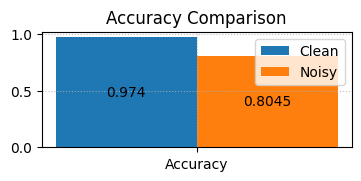

Accuracy Comparison
------------------------------
Clean		: 0.974
Noisy		: 0.804
Clean - Noisy	: 0.169
Clean : Noisy	: 21.069%
------------------------------


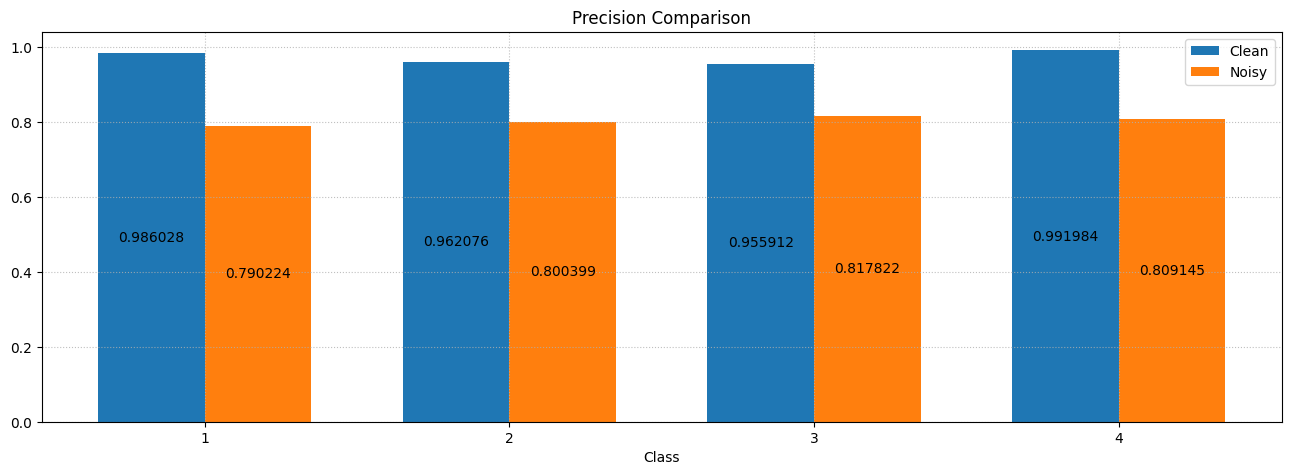

Precision Comparison
------------------------------
Class-1:
Clean		: 0.986
Noisy		: 0.790
Clean - Noisy	: 0.196
Clean : Noisy	: 24.778%
------------------------------
Class-2:
Clean		: 0.962
Noisy		: 0.800
Clean - Noisy	: 0.162
Clean : Noisy	: 20.200%
------------------------------
Class-3:
Clean		: 0.956
Noisy		: 0.818
Clean - Noisy	: 0.138
Clean : Noisy	: 16.885%
------------------------------
Class-4:
Clean		: 0.992
Noisy		: 0.809
Clean - Noisy	: 0.183
Clean : Noisy	: 22.597%
------------------------------
Average
Clean		: 0.974
Noisy		: 0.804
Clean-Noisy	: 0.170
Clean : Noisy	: 21.084%
------------------------------


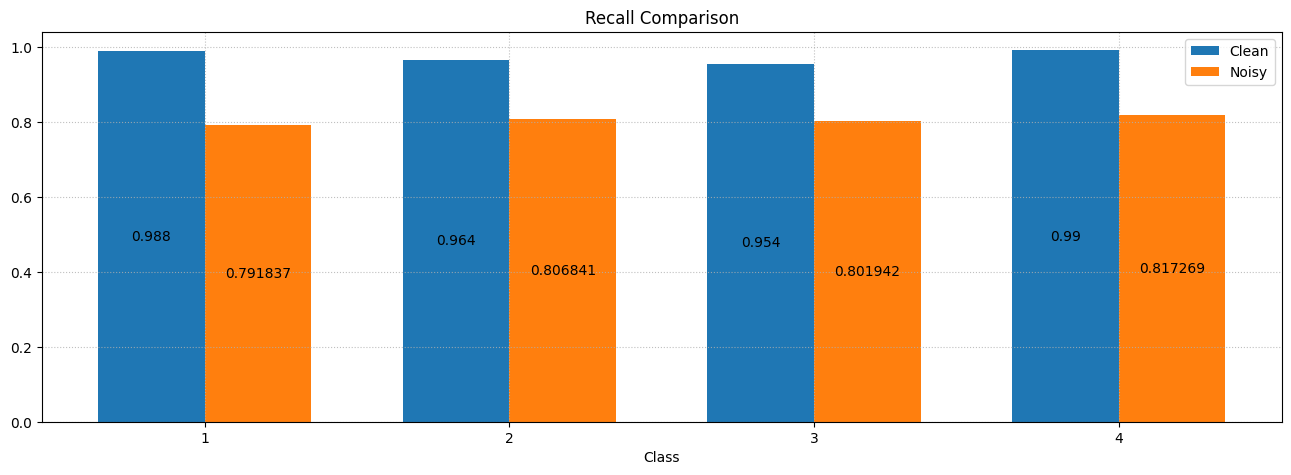

Recall Comparison
------------------------------
Class-1:
Clean		: 0.988
Noisy		: 0.792
Clean - Noisy	: 0.196
Clean : Noisy	: 24.773%
------------------------------
Class-2:
Clean		: 0.964
Noisy		: 0.807
Clean - Noisy	: 0.157
Clean : Noisy	: 19.478%
------------------------------
Class-3:
Clean		: 0.954
Noisy		: 0.802
Clean - Noisy	: 0.152
Clean : Noisy	: 18.961%
------------------------------
Class-4:
Clean		: 0.990
Noisy		: 0.817
Clean - Noisy	: 0.173
Clean : Noisy	: 21.135%
------------------------------
Average
Clean		: 0.974
Noisy		: 0.804
Clean-Noisy	: 0.170
Clean : Noisy	: 21.073%
------------------------------


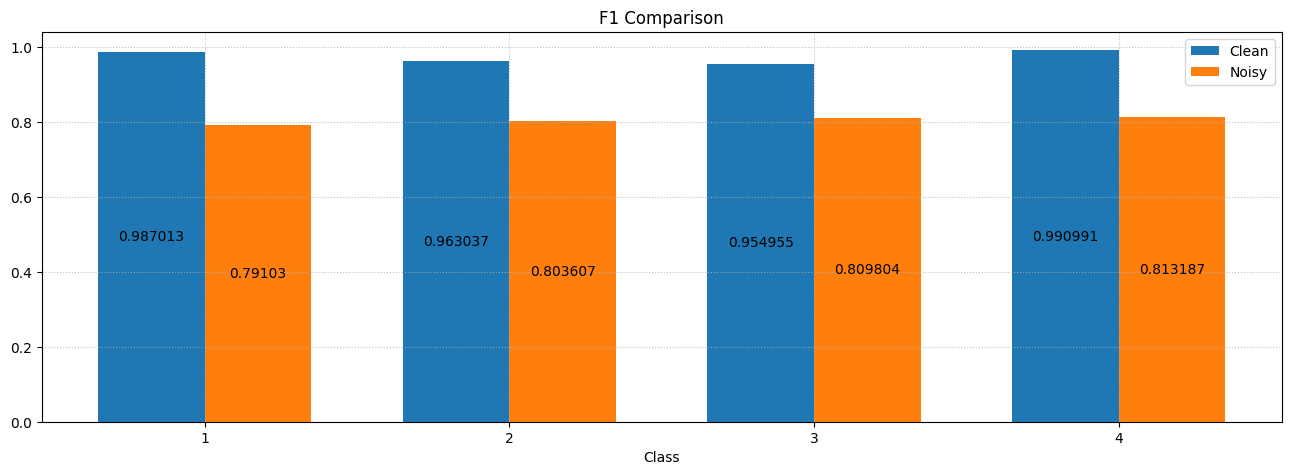

F1 Comparison
------------------------------
Class-1:
Clean		: 0.987
Noisy		: 0.791
Clean - Noisy	: 0.196
Clean : Noisy	: 24.776%
------------------------------
Class-2:
Clean		: 0.963
Noisy		: 0.804
Clean - Noisy	: 0.159
Clean : Noisy	: 19.839%
------------------------------
Class-3:
Clean		: 0.955
Noisy		: 0.810
Clean - Noisy	: 0.145
Clean : Noisy	: 17.924%
------------------------------
Class-4:
Clean		: 0.991
Noisy		: 0.813
Clean - Noisy	: 0.178
Clean : Noisy	: 21.865%
------------------------------
Average
Clean		: 0.974
Noisy		: 0.804
Clean-Noisy	: 0.170
Clean : Noisy	: 21.083%
------------------------------


In [168]:
def plot_multi_bar(labels, y_clean, y_noisy, title, xaxis_label = "", yaxis_label = ""):
    # Number of Enthusiasts for different regions
    plt.figure(figsize=(4*len(labels), 1.5**len(labels)))
    bar_width = 0.35
    x = np.arange(len(labels))

    # Grouped Bar Plot
    p_clean = plt.bar(x - bar_width/2, y_clean, bar_width, label='Clean')
    plt.bar_label(p_clean, label_type="center")
    p_noisy = plt.bar(x + bar_width/2, y_noisy, bar_width, label='Noisy')
    plt.bar_label(p_noisy, label_type="center")

    # Adding labels and title
    plt.title(title)
    plt.xticks(x, labels)
    if(xaxis_label != ""):
        plt.xlabel(xaxis_label)
    if(yaxis_label != ""):
        plt.ylabel(yaxis_label)
    plt.grid(True, alpha=0.8, linestyle=":")
    plt.legend(loc="upper right")
    plt.show()

def print_dashes(n=50):
    print("-"*n)

def metrics_diff(metric_name, metrics_clean, metrics_noisy, labels=""):
    #print(f"{metric_name} Comparison")
    
    if(type(labels) == list):
        plot_multi_bar(labels, metrics_clean, metrics_noisy, f"{metric_name} Comparison", xaxis_label="Class")
        print(f"{metric_name} Comparison")
        print_dashes(30)
        for i in range(len(labels)):
            print(f"Class-{labels[i]}:")
            print(f"Clean\t\t: {metrics_clean[i]:.3f}")
            print(f"Noisy\t\t: {metrics_noisy[i]:.3f}")
            print(f"Clean - Noisy\t: {metrics_clean[i] - metrics_noisy[i]:.3f}")
            print(f"Clean : Noisy\t: {((metrics_clean[i] - metrics_noisy[i])/metrics_noisy[i])*100:.3f}%")
            print_dashes(30)
        print("Average")
        print(f"Clean\t\t: {np.average(metrics_clean):.3f}")
        print(f"Noisy\t\t: {np.average(metrics_noisy):.3f}")
        print(f"Clean-Noisy\t: {np.average(metrics_clean)-np.average(metrics_noisy):.3f}")
        print(f"Clean : Noisy\t: {((np.average(metrics_clean)-np.average(metrics_noisy))/np.average(metrics_noisy))*100:.3f}%")
        print_dashes(30)
    else:
        plot_multi_bar([metric_name], metrics_clean, metrics_noisy, f"{metric_name} Comparison")
        print(f"{metric_name} Comparison")
        print_dashes(30)
        print(f"Clean\t\t: {metrics_clean:.3f}")
        print(f"Noisy\t\t: {metrics_noisy:.3f}")
        print(f"Clean - Noisy\t: {metrics_clean - metrics_noisy:.3f}")
        print(f"Clean : Noisy\t: {((metrics_clean - metrics_noisy)/metrics_noisy)*100:.3f}%")
        print_dashes(30)

#plot_multi_bar(["accuracy"], clean_metrics["accuracy"], noisy_metrics["accuracy"], "Accuracy Comparison")
#plot_multi_bar(clean_metrics["labels"], clean_metrics["per_class"]["precision"], noisy_metrics["per_class"]["precision"], "Precision Comparison", xaxis_label="Class")
#plot_multi_bar(clean_metrics["labels"], clean_metrics["per_class"]["recall"], noisy_metrics["per_class"]["recall"], "Recall Comparison", xaxis_label="Class")
#plot_multi_bar(clean_metrics["labels"], clean_metrics["per_class"]["f1"], noisy_metrics["per_class"]["f1"], "F1 Comparison", xaxis_label="Class")
metrics_diff("Accuracy", clean_metrics["accuracy"], noisy_metrics["accuracy"])
metrics_diff("Precision", clean_metrics["per_class"]["precision"], noisy_metrics["per_class"]["precision"], clean_metrics["labels"])
metrics_diff("Recall", clean_metrics["per_class"]["recall"], noisy_metrics["per_class"]["recall"], clean_metrics["labels"])
metrics_diff("F1", clean_metrics["per_class"]["f1"], noisy_metrics["per_class"]["f1"], clean_metrics["labels"])


# Dataset differences

In [111]:
data_path_clean = data_path + "/clean_dataset.txt"
data_path_noisy = data_path + "/noisy_dataset.txt"

X_clean, y_clean = load_wifi_dataset(data_path_clean)
X_noisy, y_noisy = load_wifi_dataset(data_path_noisy)

clean_classes, clean_classes_count = np.unique(y_clean, return_counts=True)
noisy_classes, noisy_classes_count = np.unique(y_noisy, return_counts=True)

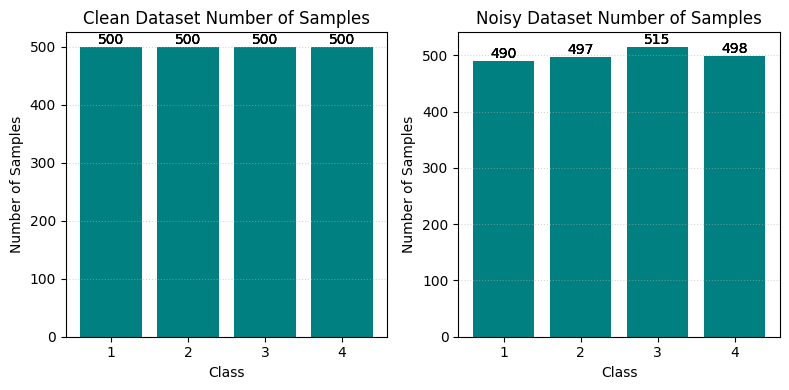

In [169]:
def plot_barchart(x, y, data_type, ax):
    for i in range(len(x)):
        p = ax.bar(x, y, color="teal")
        ax.bar_label(p)
    ax.set_title(f"{data_type} Dataset Number of Samples")
    ax.set_ylabel("Number of Samples")
    ax.set_xlabel("Class")
    ax.yaxis.grid(True, alpha=0.5, linestyle=":")

fig, ax = plt.subplots(1,2, figsize=(8,4))
plot_barchart(clean_classes, clean_classes_count, "Clean", ax[0])
plot_barchart(noisy_classes, noisy_classes_count, "Noisy", ax[1])
fig.tight_layout()